In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [69]:
df = pd.read_csv('rideshare_kaggle.csv')
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [71]:
# Identifikasi kolom kategorikal dan numerikal
kategorikal_columns = df.select_dtypes(include=['object']).columns
numerikal_columns = df.select_dtypes(exclude=['object']).columns

print("Kolom Kategorikal:")
print(kategorikal_columns)

print("\nKolom Numerikal:")
print(numerikal_columns)

Kolom Kategorikal:
Index(['id', 'datetime', 'timezone', 'source', 'destination', 'cab_type',
       'product_id', 'name', 'short_summary', 'long_summary', 'icon'],
      dtype='object')

Kolom Numerikal:
Index(['timestamp', 'hour', 'day', 'month', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility',
       'temperatureHigh', 'temperatureHighTime', 'temperatureLow',
       'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime',
       'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime',
       'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperature

In [72]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [73]:
# Menghitung rata-rata kolom "price" (bisa juga menggunakan median atau nilai lain)
average_price = df['price'].mean()

# Mengisi missing values dalam kolom "price" dengan rata-rata
df['price'].fillna(average_price, inplace=True)

# Data Cleaning

In [74]:
# Membuat DataFrame baru dengan kolom yang dipilih
data = df[['hour', 'day', 'month', 'source', 'destination', 'cab_type', 'name', 'price', 'distance', 'surge_multiplier']]

In [75]:
data.head(10)

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0
5,18,17,12,Haymarket Square,North Station,Lyft,Lux Black,16.5,0.44,1.0
6,5,26,11,Back Bay,Northeastern University,Lyft,Lyft XL,10.5,1.08,1.0
7,19,2,12,Back Bay,Northeastern University,Lyft,Lux Black,16.5,1.08,1.0
8,6,3,12,Back Bay,Northeastern University,Lyft,Shared,3.0,1.08,1.0
9,10,27,11,Back Bay,Northeastern University,Lyft,Lux Black XL,27.5,1.08,1.0


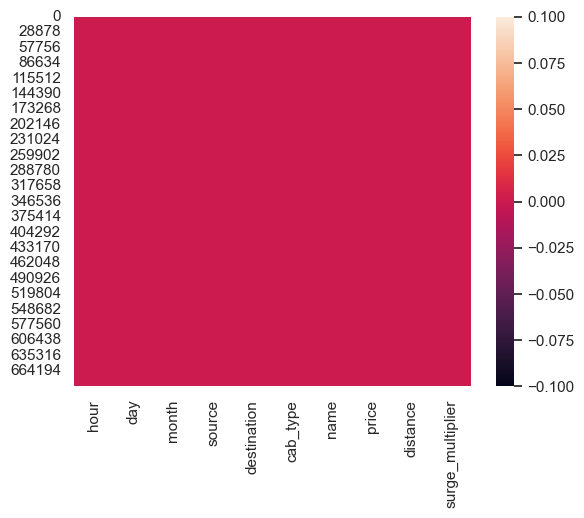

In [76]:
sns.heatmap(data.isna())
plt.show()

In [77]:
data.isna().sum()/len(data)*100

hour                0.0
day                 0.0
month               0.0
source              0.0
destination         0.0
cab_type            0.0
name                0.0
price               0.0
distance            0.0
surge_multiplier    0.0
dtype: float64

# EDA

In [60]:
import pingouin as pg

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

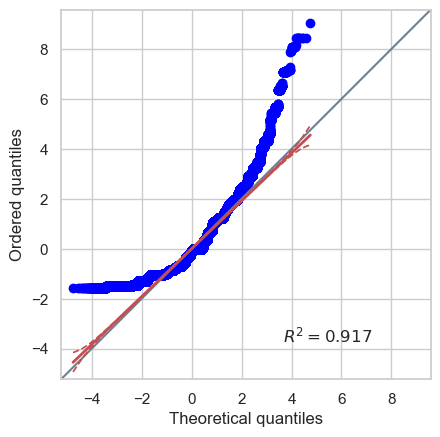

In [78]:
pg.qqplot(data.price)

<Axes: xlabel='price', ylabel='Count'>

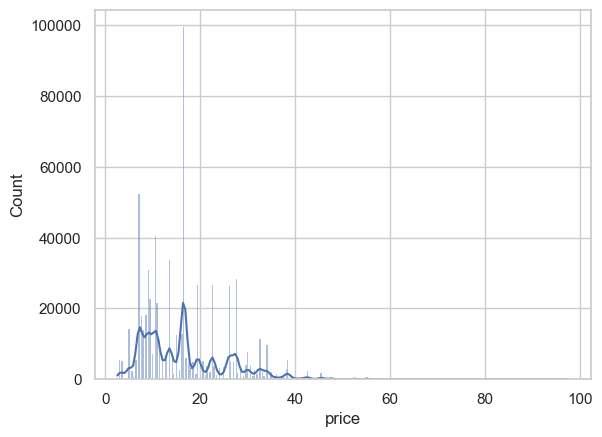

In [79]:
sns.histplot(data.price, kde=True)

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

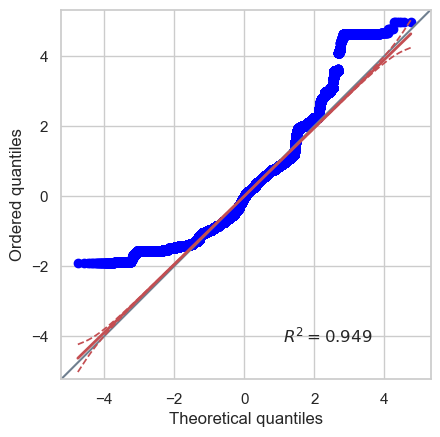

In [80]:
pg.qqplot(data.distance)

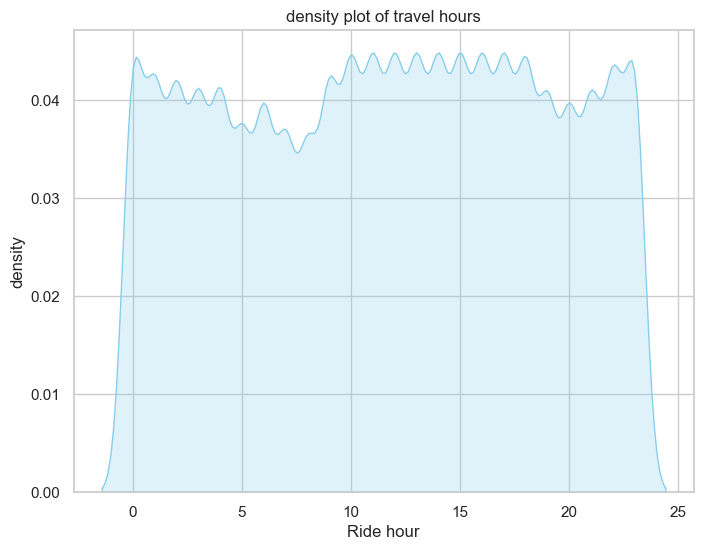

In [81]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data, x='hour', fill=True, common_norm=False, color='skyblue')
plt.title('density plot of travel hours')
plt.xlabel('Ride hour')
plt.ylabel('density')
plt.show()

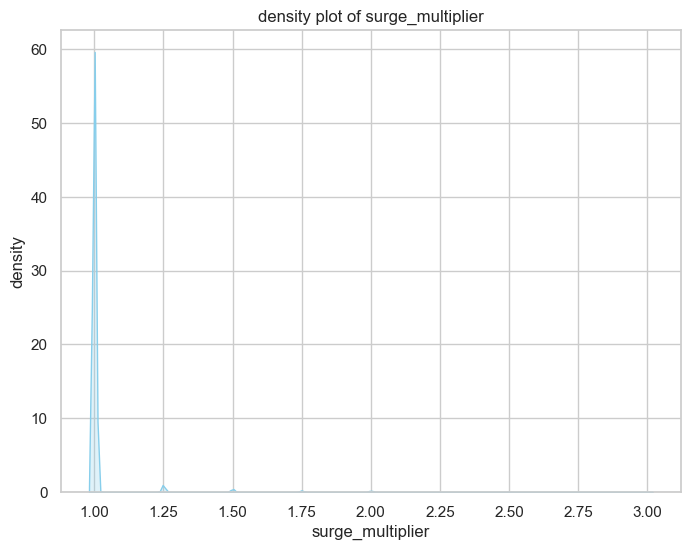

In [82]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data, x='surge_multiplier', fill=True, common_norm=False, color='skyblue')
plt.title('density plot of surge_multiplier')
plt.xlabel('surge_multiplier')
plt.ylabel('density')
plt.show()

In [83]:
data['surge_multiplier'].value_counts()

surge_multiplier
1.00    672096
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
Name: count, dtype: int64

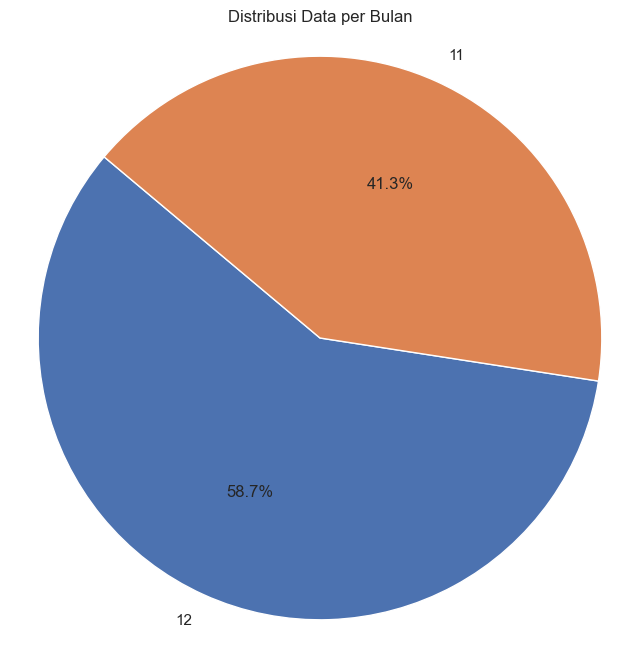

In [84]:
# Menghitung jumlah data untuk setiap bulan
month_counts = data['month'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(month_counts, labels=month_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Data per Bulan')
plt.axis('equal')  # Untuk membuat lingkaran terlihat sebagai lingkaran, bukan elips

# Menampilkan pie chart
plt.show()

In [85]:
data['month'].value_counts()

month
12    406614
11    286457
Name: count, dtype: int64

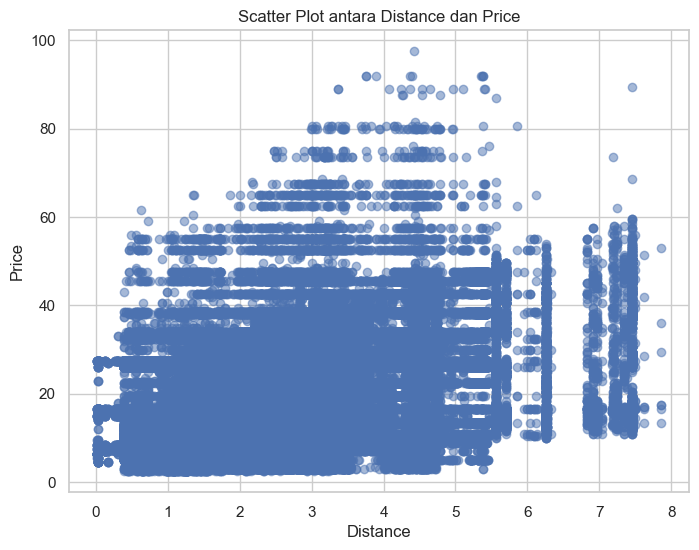

In [86]:
distance = data['distance']
price = data['price']

# Membuat scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(distance, price, alpha=0.5)
plt.title('Scatter Plot antara Distance dan Price')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.grid(True)

# Menampilkan plot
plt.show()

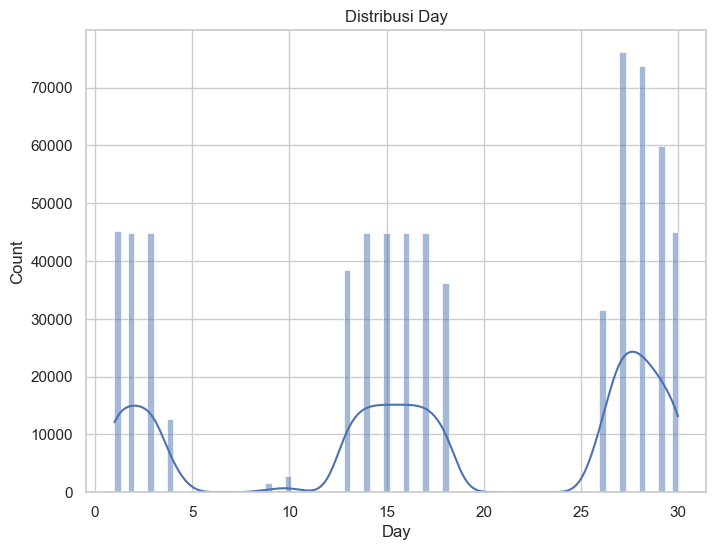

In [87]:
# Plot distribusi 'day'
plt.figure(figsize=(8, 6))
sns.histplot(data['day'], kde=True)
plt.title('Distribusi Day')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

In [88]:
data.isna().sum()/len(data)*100

hour                0.0
day                 0.0
month               0.0
source              0.0
destination         0.0
cab_type            0.0
name                0.0
price               0.0
distance            0.0
surge_multiplier    0.0
dtype: float64

In [89]:
data.head(10)

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0
5,18,17,12,Haymarket Square,North Station,Lyft,Lux Black,16.5,0.44,1.0
6,5,26,11,Back Bay,Northeastern University,Lyft,Lyft XL,10.5,1.08,1.0
7,19,2,12,Back Bay,Northeastern University,Lyft,Lux Black,16.5,1.08,1.0
8,6,3,12,Back Bay,Northeastern University,Lyft,Shared,3.0,1.08,1.0
9,10,27,11,Back Bay,Northeastern University,Lyft,Lux Black XL,27.5,1.08,1.0


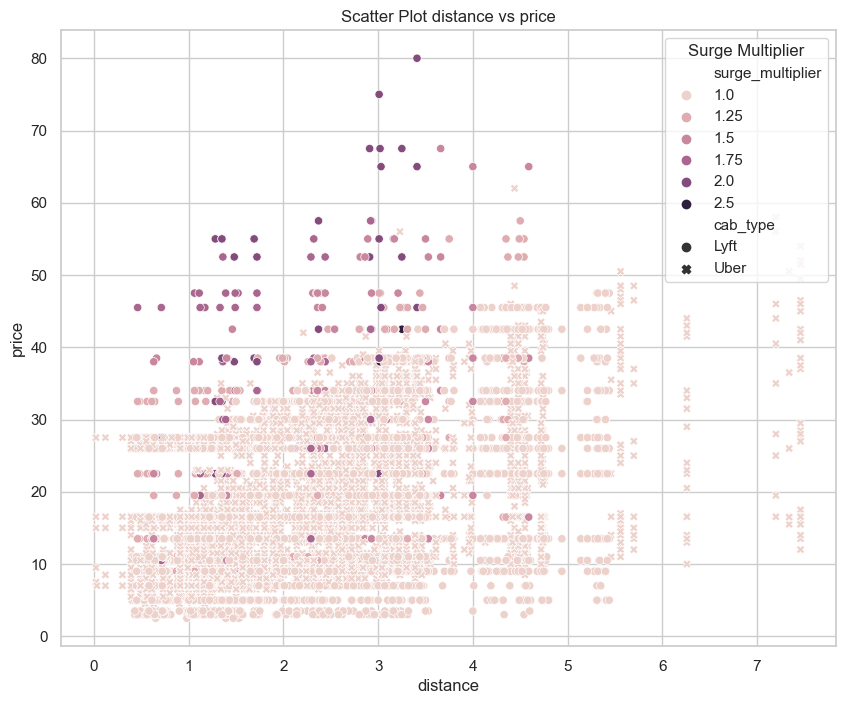

In [90]:
sample_data = data.iloc[:20000]

# Membuat scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=sample_data, x='distance', y='price', hue='surge_multiplier', style='cab_type')
plt.title('Scatter Plot distance vs price')
plt.xlabel('distance')
plt.ylabel('price')

# Menampilkan plot
plt.legend(title='Surge Multiplier', loc='upper right')
plt.show()

In [91]:
source_counts = data['source'].value_counts()
print(source_counts)

source
Financial District         58857
Theatre District           57813
Back Bay                   57792
Boston University          57764
North End                  57763
Fenway                     57757
Northeastern University    57756
South Station              57750
Haymarket Square           57736
West End                   57562
Beacon Hill                57403
North Station              57118
Name: count, dtype: int64


In [92]:
destination_counts = data['destination'].value_counts()
print(destination_counts)

destination
Financial District         58851
Theatre District           57798
Back Bay                   57780
Haymarket Square           57764
Boston University          57764
Fenway                     57757
North End                  57756
Northeastern University    57755
South Station              57749
West End                   57575
Beacon Hill                57403
North Station              57119
Name: count, dtype: int64


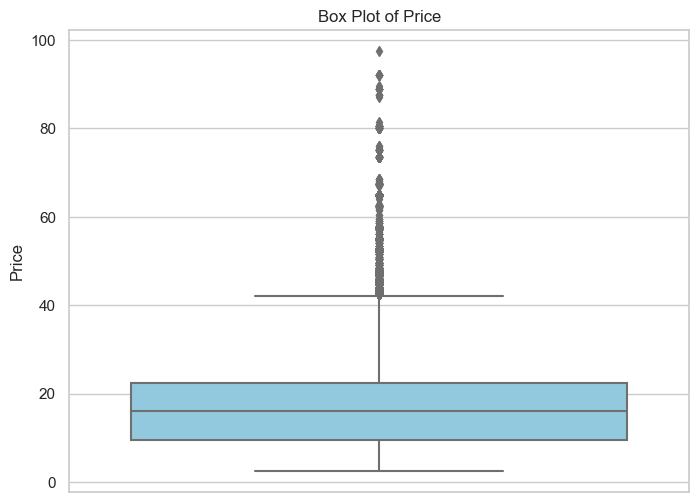

In [93]:
plt.figure(figsize=(8, 6))
sns.boxplot(data ,y='price', color='skyblue')
plt.title('Box Plot of Price')
plt.ylabel('Price')
plt.show()

In [94]:
# Menghitung mode dari kolom "price"
mode_price = data['price'].mode()

print(f"Mode Price: {mode_price[0]}")

Mode Price: 16.545125490614065


In [95]:
# variability
# Menghitung variabilitas (varians) dari kolom "price"
price_variance = data['price'].var()

# Menghitung simpangan baku (standard deviation) dari kolom "price"
price_std_deviation = data['price'].std()

# Menampilkan hasil
print(f"Varians Price: {price_variance:.2f}")
print(f"Simpangan Baku Price: {price_std_deviation:.2f}")

Varians Price: 80.03
Simpangan Baku Price: 8.95


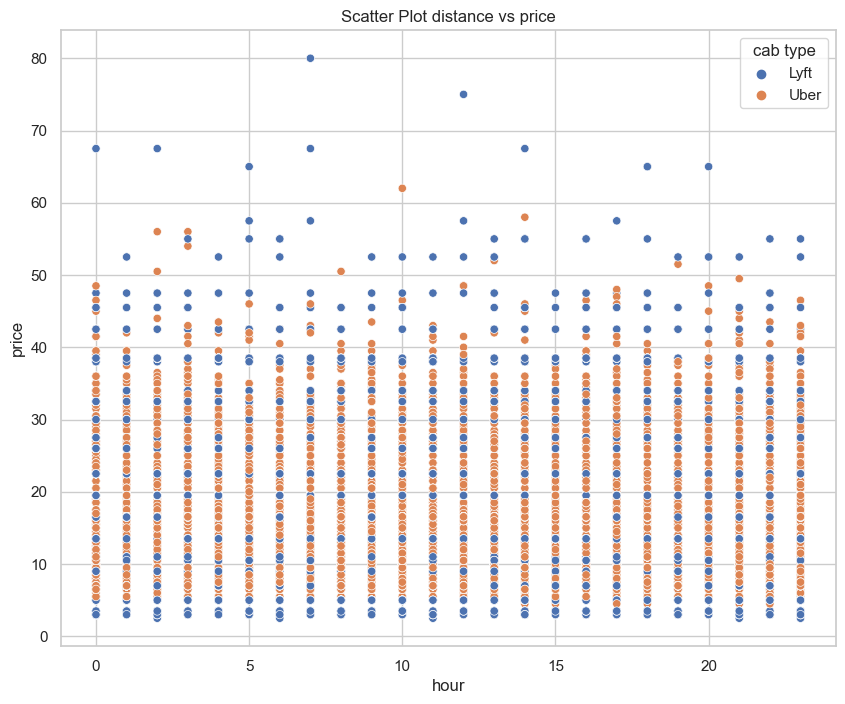

In [96]:
# Membuat scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=sample_data, x='hour', y='price', hue='cab_type')
plt.title('Scatter Plot distance vs price')
plt.xlabel('hour')
plt.ylabel('price')

# Menampilkan plot
plt.legend(title='cab type', loc='upper right')
plt.show()

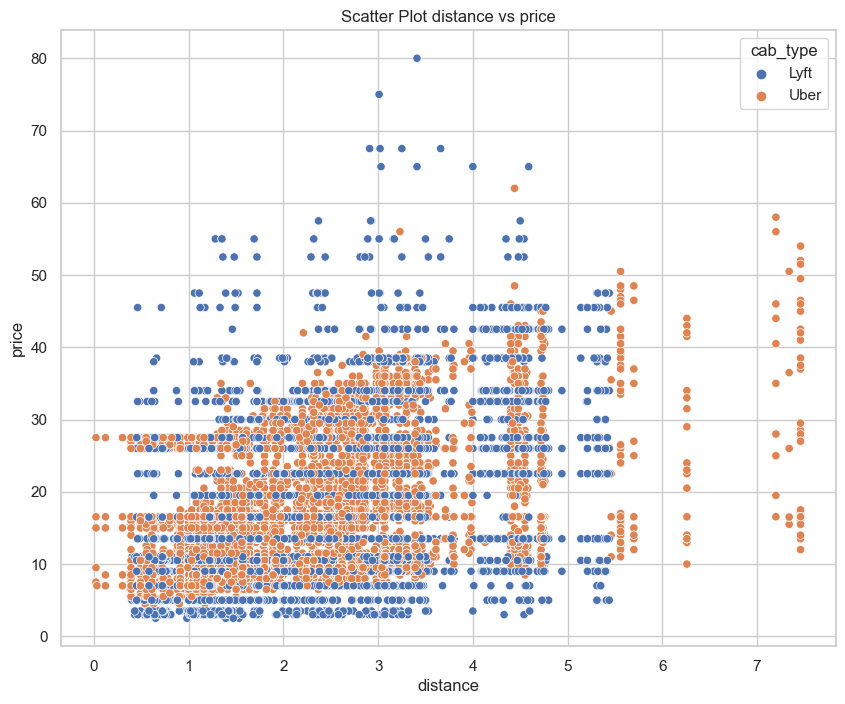

In [97]:
# Membuat scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=sample_data, x='distance', y='price', hue='cab_type')
plt.title('Scatter Plot distance vs price')
plt.xlabel('distance')
plt.ylabel('price')

# Menampilkan plot
plt.legend(title='cab_type', loc='upper right')
plt.show()

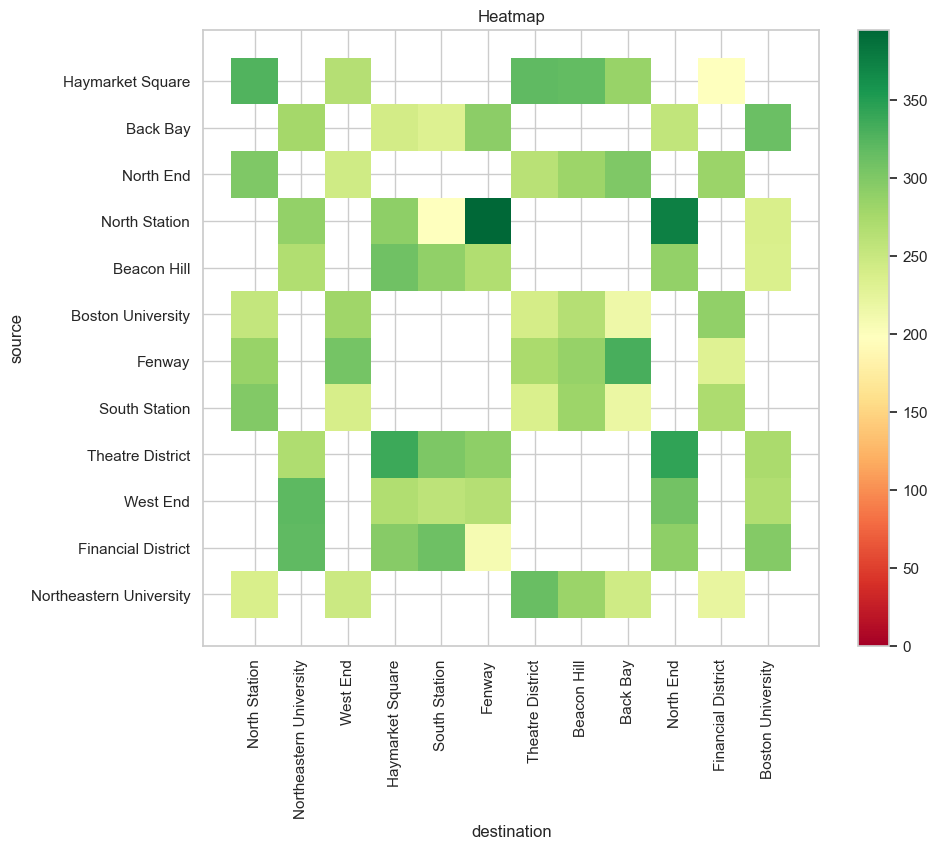

In [98]:
# Membuat heatmap plot
plt.figure(figsize=(10, 8))
sns.histplot(data=sample_data, x='destination', y='source', binwidth=(0.02, 0.02), cbar=True, cmap='RdYlGn')
plt.title('Heatmap')
plt.xlabel('destination')
plt.ylabel('source')

# Menampilkan plot
plt.xticks(rotation=90)  # Mengatur label sumbu x agar tegak
plt.gca().set_aspect('equal')  # Mengatur aspek rasio menjadi 1
plt.show()

## Observation

In [103]:
# Menghitung kuantil
quantiles = data['price'].quantile([0, 0.25, 0.75])
Q1 = quantiles.iloc[1]
Q3 = quantiles.iloc[2]

# Menghitung IQR
IQR = Q3 - Q1

# Menghitung nilai batas atas dan batas bawah
upper_limit = quantiles.iloc[2] + 1.5 * IQR
lower_limit = quantiles.iloc[1] - 1.5 * IQR

In [105]:
# # Mengganti outlier dengan NaN
# data['price'] = np.where((data['price'] > upper_limit) | (data['price'] < lower_limit), np.nan, data['price'])

# Mengganti outlier dengan NaN
data.loc[(data['price'] > upper_limit) | (data['price'] < lower_limit), 'price'] = np.nan

## Data preparation

In [114]:
# Identifikasi kolom kategorikal dan numerikal
categorical = data.select_dtypes(include=['object']).columns
numerical = data.select_dtypes(include=['number']).columns

print("Kolom Kategorikal:", categorical)
print("\nKolom Numerikal:", numerical)

Kolom Kategorikal: Index(['source', 'destination', 'cab_type', 'name'], dtype='object')

Kolom Numerikal: Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier'], dtype='object')


In [118]:
from sklearn.preprocessing import OneHotEncoder
# Menggunakan One-Hot Encoding untuk kolom kategoris
categorical_cols = ['source', 'destination', 'cab_type', 'name']
encoder = OneHotEncoder(sparse_output=False, drop='first')
dummy_vars = encoder.fit_transform(data[categorical_cols])

In [119]:
# Mengganti nama kolom dummy
dummy_cols = encoder.get_feature_names_out(categorical_cols)
dummy_df = pd.DataFrame(dummy_vars, columns=dummy_cols)

# Menggabungkan variabel dummy dengan DataFrame asli
data = pd.concat([data, dummy_df], axis=1)

# Menghapus kolom kategoris asli
data = data.drop(categorical_cols, axis=1)

In [120]:
# Menghitung jumlah nilai unik dalam setiap kolom
rideshare_unique = data.nunique()

# Menampilkan hasil
print(rideshare_unique)

hour                                    24
day                                     17
month                                    2
price                                   84
distance                               549
surge_multiplier                         7
source_Beacon Hill                       2
source_Boston University                 2
source_Fenway                            2
source_Financial District                2
source_Haymarket Square                  2
source_North End                         2
source_North Station                     2
source_Northeastern University           2
source_South Station                     2
source_Theatre District                  2
source_West End                          2
destination_Beacon Hill                  2
destination_Boston University            2
destination_Fenway                       2
destination_Financial District           2
destination_Haymarket Square             2
destination_North End                    2
destination

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   hour                                 693071 non-null  int64  
 1   day                                  693071 non-null  int64  
 2   month                                693071 non-null  int64  
 3   price                                683817 non-null  float64
 4   distance                             693071 non-null  float64
 5   surge_multiplier                     693071 non-null  float64
 6   source_Beacon Hill                   693071 non-null  float64
 7   source_Boston University             693071 non-null  float64
 8   source_Fenway                        693071 non-null  float64
 9   source_Financial District            693071 non-null  float64
 10  source_Haymarket Square              693071 non-null  float64
 11  source_North 

In [124]:
from sklearn.preprocessing import StandardScaler

# Membuat objek StandarScaler
scaler = StandardScaler()

# Standarisasi variabel numerik
data[numerical] = scaler.fit_transform(data[numerical])

In [145]:
data.head()

,hour,day,month,price,distance,surge_multiplier,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,...,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,-0.376957,-0.179755,0.839341,-1.354353,-1.536021,-0.151349,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-1.384425,0.922198,-1.191411,-0.624330,-1.536021,-0.151349,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.528349,1.022375,-1.191411,-1.111012,-1.536021,-0.151349,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.096577,1.222730,-1.191411,1.200729,-1.536021,-0.151349,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.240501,1.122553,-1.191411,-0.867671,-1.536021,-0.151349,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Modelling

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [165]:
# Menghapus baris dengan nilai yang hilang
data.dropna(inplace=True)

# Pisahkan variabel target (Harga) dari variabel fitur
X = data.drop(columns=['price'])
y = data['price']

# Dapatkan jumlah instance dan fitur
contoh = X.shape[0]
fitur = X.shape[1]

# Buat vektor identitas
vektor_identitas = np.ones(contoh)

# Bagi data menjadi set pelatihan dan pengujian
np.random.seed(40)  # Untuk reproduksibilitas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [166]:
print("Bentuk set pengujian:", X_test.shape)
print("Bentuk set pelatihan:", X_train.shape)
print("Rata-rata set pelatihan:", X_train.values.mean(), y_train.mean())
print("Rata-rata set pengujian:", X_test.values.mean(), y_test.mean())
print("Standar deviasi set pelatihan:", X_train.values.std(), y_train.std())
print("Standar deviasi set pengujian:", X_test.values.std(), y_test.std())

Bentuk set pengujian: (136764, 40)
Bentuk set pelatihan: (547053, 40)
Rata-rata set pelatihan: 0.08133158725047765 -0.00040398402858721124
Rata-rata set pengujian: 0.08151690267858153 0.0016159272527182637
Standar deviasi set pelatihan: 0.4395216843686939 1.0001712352415344
Standar deviasi set pengujian: 0.43958415714492266 0.9993204493919724


In [167]:
# Membuat model regresi linier
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [168]:
# Membuat pipeline dengan dua langkah: Preprocessing (Scaling) dan Model Regresi Linier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # StandardScaler untuk preprocessing
    ('regressor', LinearRegression())  # Model Regresi Linier
])

# Training pipeline pada data pelatihan
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [169]:
# Melakukan prediksi pada data pelatihan dan data validasi
y_train_pred = pipeline.predict(X_train)
y_val_pred = pipeline.predict(X_test)

# Menampilkan statistik evaluasi
print("Training Loss")
print("R^2:", r2_score(y_train, y_train_pred))
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("\nValidation Loss")
print("R^2:", r2_score(y_test, y_val_pred))
print("MAE:", mean_absolute_error(y_test, y_val_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_val_pred)))

Training Loss
R^2: 0.9239183748789241
MAE: 0.20340511439330386
RMSE: 0.2758759575237319

Validation Loss
R^2: 0.9240586347359859
MAE: 0.20295392856070887
RMSE: 0.2753863355585662


In [170]:
pipeline.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('regressor', LinearRegression())],
 'verbose': False,
 'scaler': StandardScaler(),
 'regressor': LinearRegression(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'regressor__copy_X': True,
 'regressor__fit_intercept': True,
 'regressor__n_jobs': None,
 'regressor__positive': False}

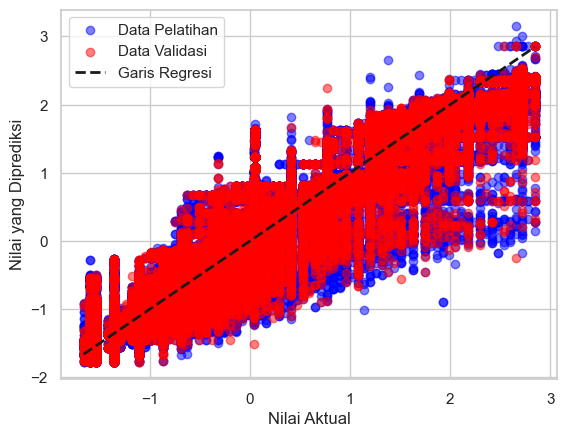

In [171]:
# Membuat plot scatter plot untuk data pelatihan
plt.scatter(y_train, y_train_pred, c='blue', label='Data Pelatihan', alpha=0.5)

# Membuat plot scatter plot untuk data validasi
plt.scatter(y_test, y_val_pred, c='red', label='Data Validasi', alpha=0.5)

# Menambahkan garis regresi
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, label='Garis Regresi')

# Menentukan label sumbu x dan y
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai yang Diprediksi')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

In [73]:
# # Pisahkan fitur (X) dan target (y)
# X = data.drop('price', axis=1)
# y = data['price']

# # Bagi data menjadi data pelatihan dan data pengujian
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define preprocessing steps
# numeric_features = ['distance', 'month', 'surge_multiplier', 'hour']
# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())
# ])

# categorical_features = ['source', 'destination']
# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder())
# ])

# # Combine preprocessing steps
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])

# # Create the final pipeline with preprocessing and Linear Regression model
# model = Pipeline(steps=[('preprocessor', preprocessor),
#                         ('classifier', LinearRegression())])

# # Train the model
# model.fit(X_train, y_train)

# # Make predictions
# y_pred = model.predict(X_test)

In [74]:
model.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('num',
                                    Pipeline(steps=[('imputer', SimpleImputer()),
                                                    ('scaler', StandardScaler())]),
                                    ['distance', 'month', 'surge_multiplier',
                                     'hour']),
                                   ('cat',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehot', OneHotEncoder())]),
                                    ['source', 'destination'])])),
  ('classifier', LinearRegression())],
 'verbose': False,
 'preprocessor': ColumnTransformer(transformers=[('num',
                                  Pipeline(steps=[('imputer', SimpleImputer()),
                                                  ('scaler', StandardScale

In [75]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # Menggunakan model untuk membuat prediksi pada data pengujian
# y_pred = model.predict(X_test)

# # Menghitung metrik evaluasi
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# # Menampilkan hasil evaluasi
# print("Mean Absolute Error (MAE):", mae)
# print("Mean Squared Error (MSE):", mse)
# print("R-squared (R^2) Score:", r2)

Mean Absolute Error (MAE): 6.608616521203752
Mean Squared Error (MSE): 66.91494004151059
R-squared (R^2) Score: 0.16291150754407568


NameError: name 'gridsearch' is not defined